<a href="https://colab.research.google.com/github/winterForestStump/thesis/blob/main/evaluation/question_bge-reranker_x_phi3-4k/question_partition__eval_results.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/winterForestStump/thesis/main/evaluation/question_bge-reranker_x_phi3-4k/eval_resuts_argilla_question_partition.csv')
category_order = ['YES', 'UNSURE', 'NO']

In [3]:
TEXT_SIZE = 20
LABEL_SIZE = 18

/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  fig.canvas.print_figure(bytes_io, **kw)


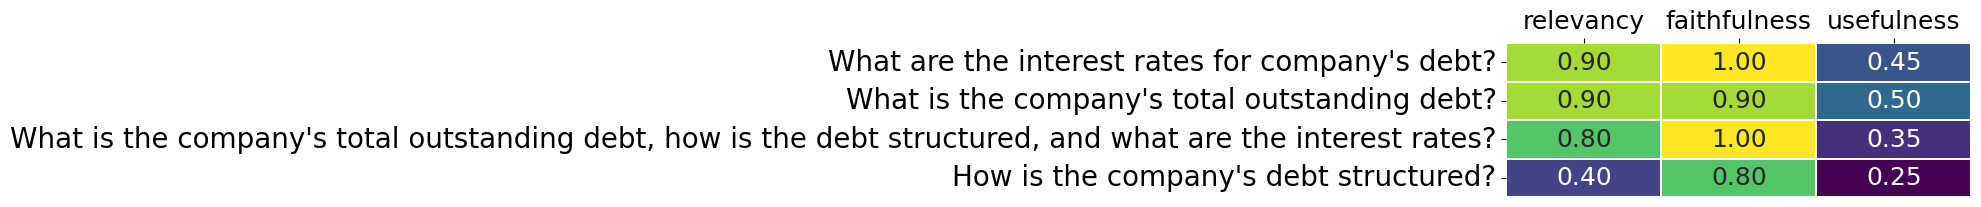

In [9]:
## 'Average Relevancy, Faithfulness, and Usefulness Values for Each Query'

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Convert categorical values to numerical values
value_mapping = {'YES': 1, 'UNSURE': 0.5, 'NO': 0}

df['relevancy'] = df['relevancy_value'].map(value_mapping)
df['faithfulness'] = df['faithfulness_value'].map(value_mapping)
df['usefulness'] = df['usefulness_value'].map(value_mapping)

# Calculate average values for each query
average_values = df[['query', 'relevancy', 'faithfulness', 'usefulness']].groupby('query').mean().sort_values(by='relevancy', ascending=False)

# Create a heatmap for the average values
plt.figure(figsize=(6, 2), layout='compressed')
ax = sns.heatmap(average_values, annot=True, cmap='viridis', linewidths=.2, cbar=False, fmt='.2f', annot_kws={"size": LABEL_SIZE})
plt.tick_params(axis='x', which='both', bottom=False, top=True, labelbottom=False, labeltop=True, labelsize=LABEL_SIZE)
plt.tick_params(axis='y', which='both', labelleft=True, labelsize=TEXT_SIZE)
ax.set_ylabel(None, fontsize=LABEL_SIZE)
plt.show()